In [1]:
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np

In [2]:
def split_data(data, ratio):
    '''
    Create randomized train set and test set based on the ratio
    ---
    Input:
        data[pd df]     data
        ratio[int]      test:train ratio
    Output:
        testdata[pd df]
        traindata[pd df]
    '''
    # Generate random indices
    indices = np.random.permutation(len(data))
    # Calculate how many entries the test data will have
    test_size = int(len(data)*ratio)
    # Get the test indices from the randomly generated indices
    test_indices = indices[:test_size]
    # Get the train indices from the randomly generated indices
    train_indices = indices[test_size:]
    # Return the data corresponding to the indices
    return data.iloc[test_indices], data.iloc[train_indices]

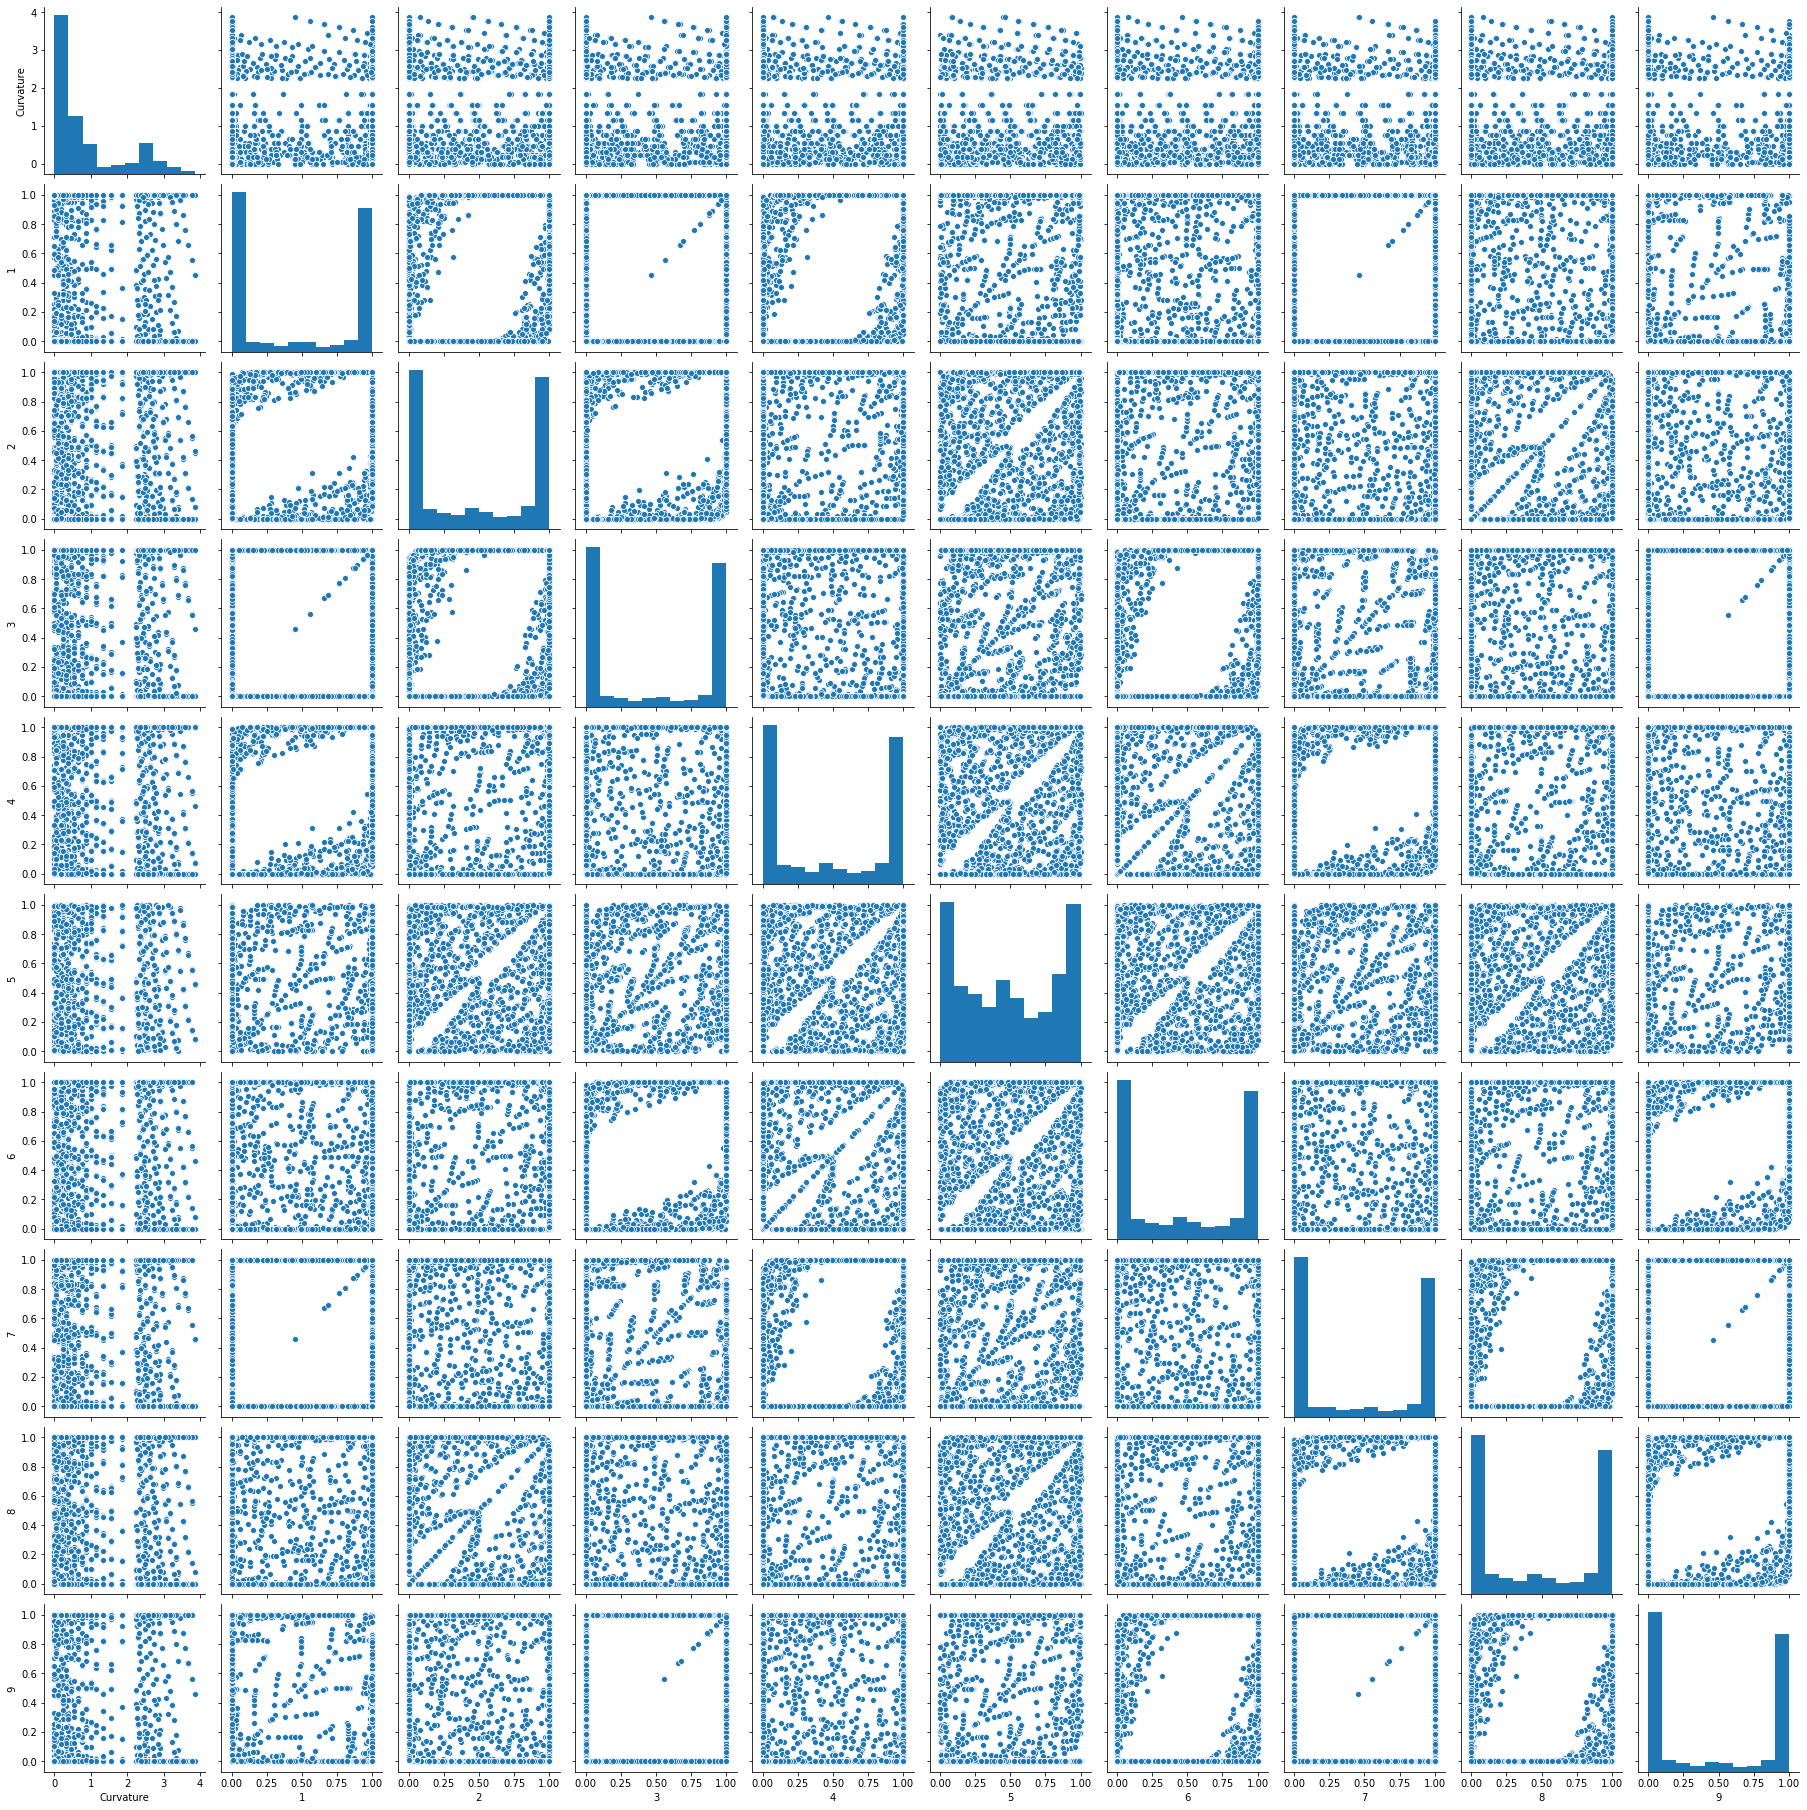

In [36]:
import seaborn as sns
sns.pairplot(train_set)

In [58]:
# Read data
data = pd.read_feather('data.feather')
# Normalize curvature
data['Curvature'] = np.abs(data['Curvature'])/np.abs(data['Curvature']).max()
# data['Curvature'] = np.log(data['Curvature'])
# Split data
test_set, train_set = split_data(data, 0.2)

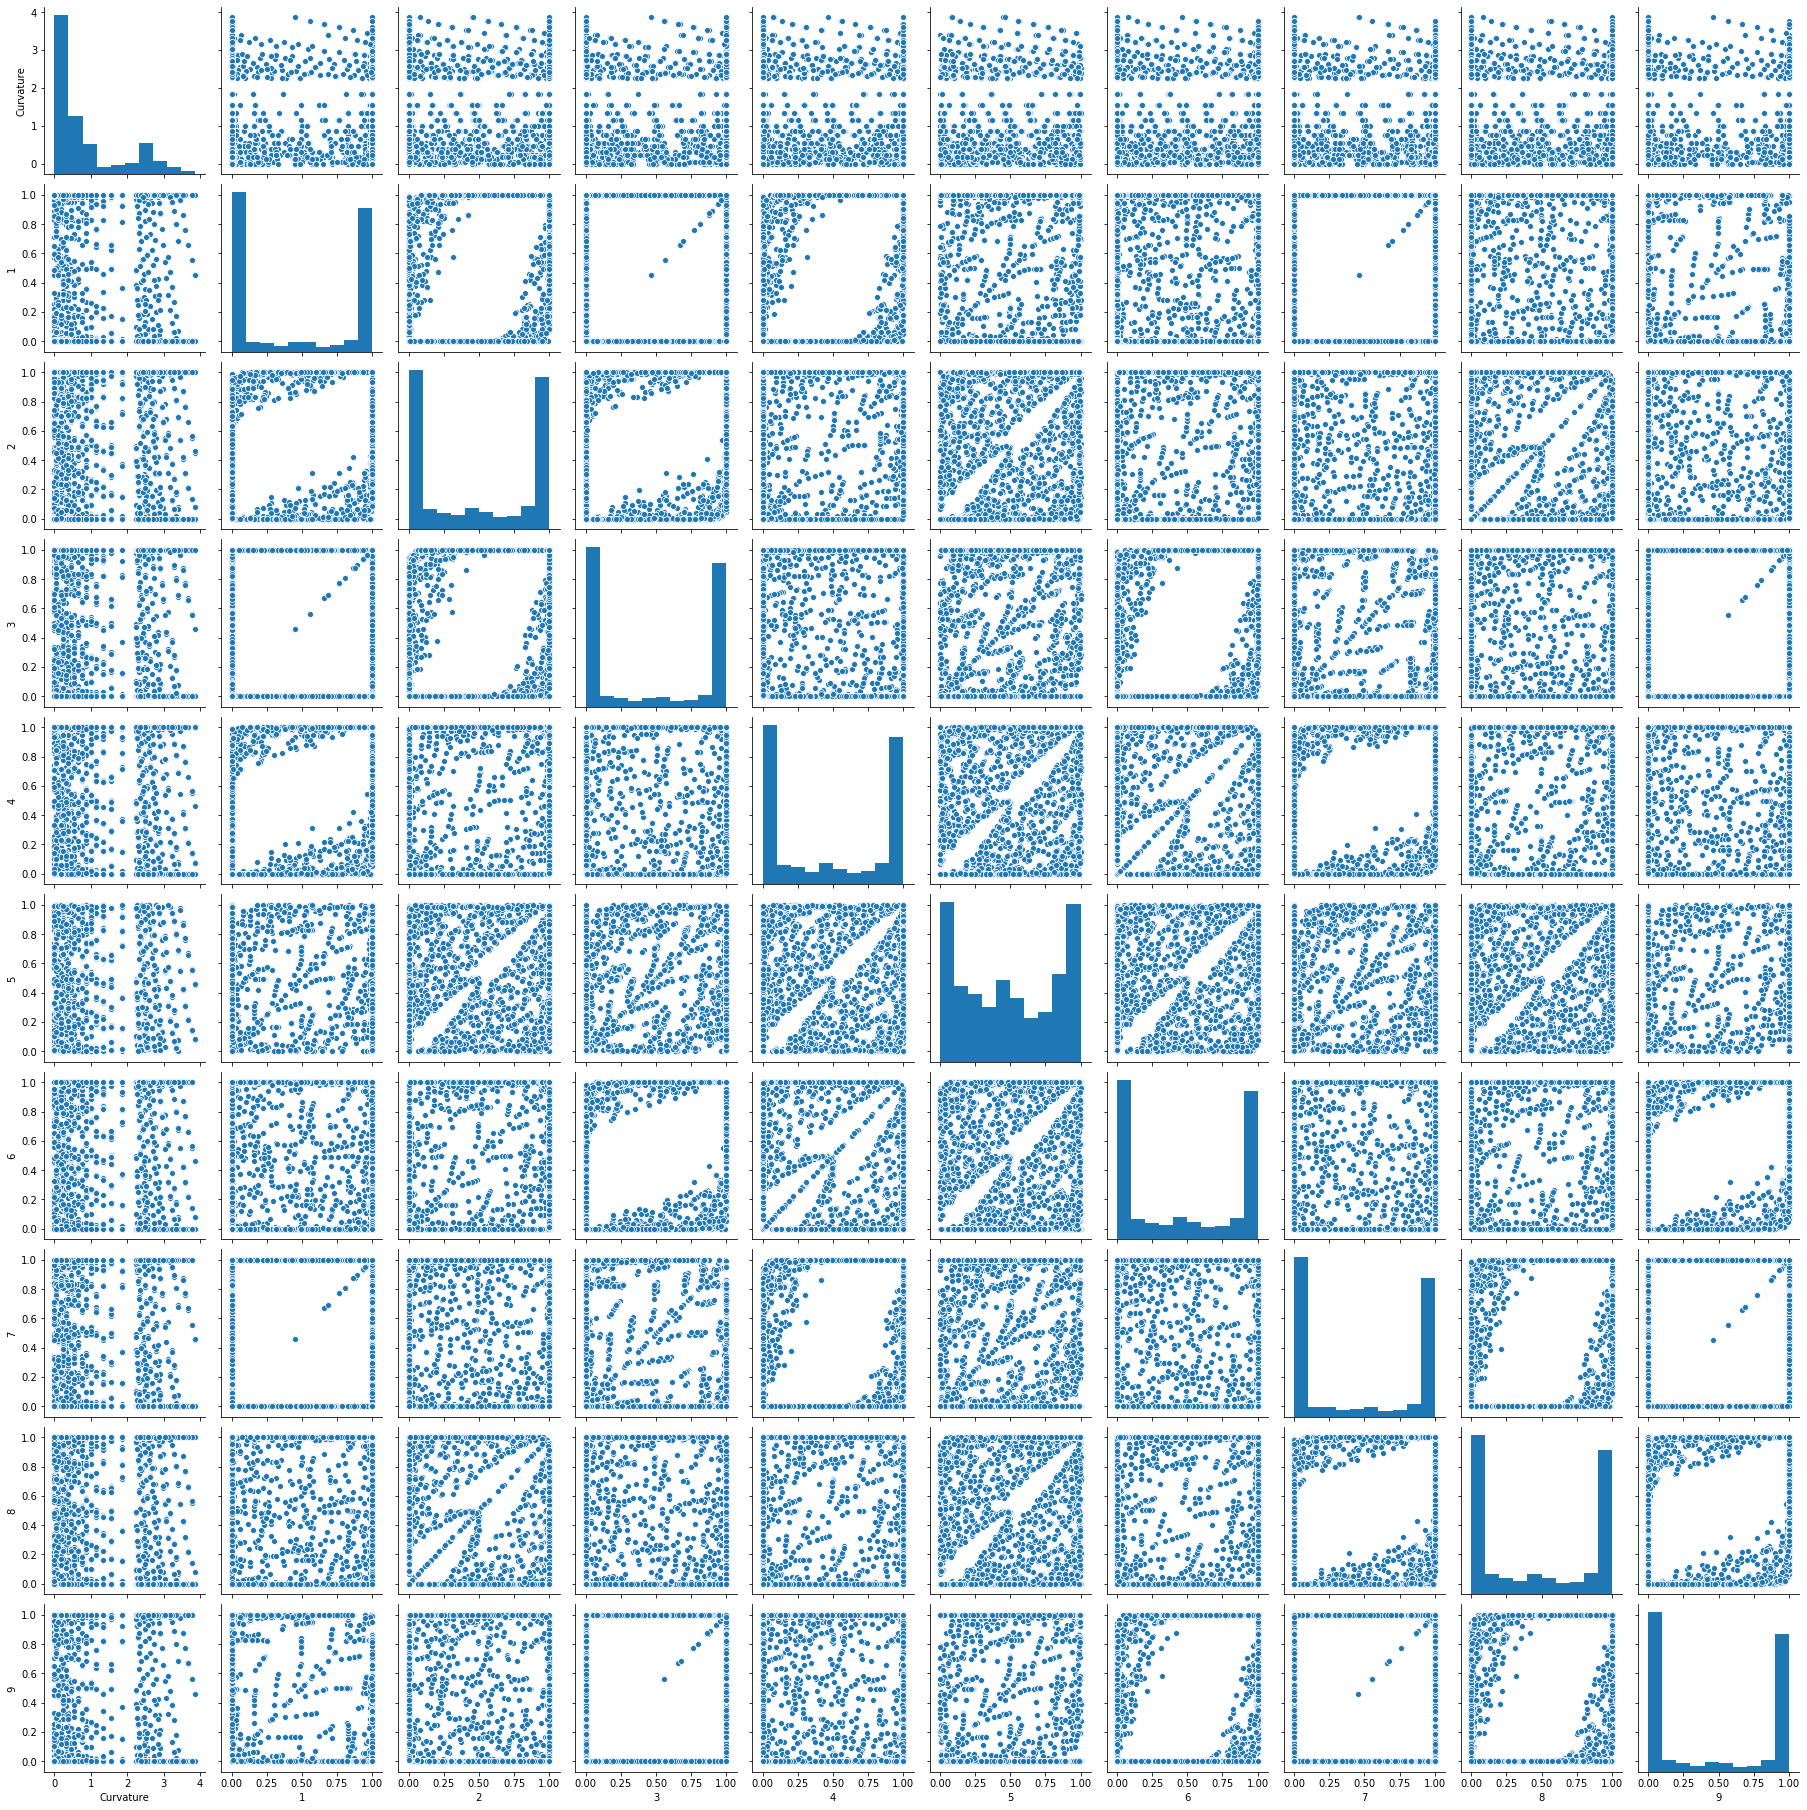

In [32]:
import seaborn as sns
sns.pairplot(train_set)

In [59]:
# Split the training and test data into labels (first column) and data
test_labels = test_set.iloc[:, 0].to_numpy()
test_data = test_set.iloc[:, 1:].to_numpy()
train_labels = train_set.iloc[:, 0].to_numpy()
train_data = train_set.iloc[:, 1:].to_numpy()
print(f'train_data: \n{train_data}')
print(f'train_labels: \n{train_labels}')

train_data: 
[[0.     0.     0.127  ... 0.0079 0.709  1.    ]
 [0.8428 1.     1.     ... 0.     0.1844 0.932 ]
 [1.     0.3753 0.     ... 1.     0.1454 0.    ]
 ...
 [0.     0.2828 1.     ... 0.     0.     0.7111]
 [0.     0.     0.     ... 0.9958 1.     0.9963]
 [1.     0.9994 0.4289 ... 0.4289 0.     0.    ]]
train_labels: 
[0.02222222 0.02222222 0.02857143 ... 0.26315789 0.21276596 0.03076923]


In [67]:
# Build keras model
model = tf.keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=[9]),
    layers.Dense(1)
])

# Compile model
model.compile(optimizer=tf.keras.optimizers.Adam(0.01), loss='mse', metrics=['mae'])

In [68]:
# Fit Data
model.fit(train_data, train_labels, epochs=1000, batch_size=32, validation_split=0.2)

Train on 2966 samples, validate on 742 samples
Epoch 1/100
2966/2966 [==============================] - 0s 103us/sample - loss: 0.0216 - mae: 0.1020 - val_loss: 0.0150 - val_mae: 0.0729
Epoch 2/100
2966/2966 [==============================] - 0s 35us/sample - loss: 0.0116 - mae: 0.0749 - val_loss: 0.0120 - val_mae: 0.0744
Epoch 3/100
2966/2966 [==============================] - 0s 35us/sample - loss: 0.0078 - mae: 0.0631 - val_loss: 0.0083 - val_mae: 0.0647
Epoch 4/100
2966/2966 [==============================] - 0s 35us/sample - loss: 0.0062 - mae: 0.0569 - val_loss: 0.0065 - val_mae: 0.0561
Epoch 5/100
2966/2966 [==============================] - 0s 32us/sample - loss: 0.0055 - mae: 0.0526 - val_loss: 0.0051 - val_mae: 0.0473
Epoch 6/100
2966/2966 [==============================] - 0s 34us/sample - loss: 0.0047 - mae: 0.0483 - val_loss: 0.0048 - val_mae: 0.0482
Epoch 7/100
2966/2966 [==============================] - 0s 35us/sample - loss: 0.0042 - mae: 0.0456 - val_loss: 0.0042 - va

2966/2966 [==============================] - 0s 37us/sample - loss: 0.0011 - mae: 0.0244 - val_loss: 0.0012 - val_mae: 0.0209
Epoch 60/100
2966/2966 [==============================] - 0s 35us/sample - loss: 0.0011 - mae: 0.0245 - val_loss: 0.0014 - val_mae: 0.0273
Epoch 61/100
2966/2966 [==============================] - 0s 32us/sample - loss: 0.0013 - mae: 0.0262 - val_loss: 0.0015 - val_mae: 0.0247
Epoch 62/100
2966/2966 [==============================] - 0s 32us/sample - loss: 0.0014 - mae: 0.0284 - val_loss: 0.0015 - val_mae: 0.0256
Epoch 63/100
2966/2966 [==============================] - 0s 36us/sample - loss: 0.0010 - mae: 0.0225 - val_loss: 0.0013 - val_mae: 0.0268
Epoch 64/100
2966/2966 [==============================] - 0s 37us/sample - loss: 0.0011 - mae: 0.0245 - val_loss: 9.9361e-04 - val_mae: 0.0203
Epoch 65/100
2966/2966 [==============================] - 0s 36us/sample - loss: 0.0010 - mae: 0.0235 - val_loss: 0.0012 - val_mae: 0.0221
Epoch 66/100
2966/2966 [============

In [69]:
test_predictions = model.predict(test_data).flatten()
print(test_predictions)

[-7.10666180e-04  2.10592151e-02  9.83778536e-02  9.05710459e-03
  4.86385524e-02  3.57260704e-02  1.56791806e-02  1.86086893e-01
  3.11891377e-01  2.23085165e-01  2.32788563e-01  5.65646291e-02
  6.22107387e-02  3.36992741e-03  2.84387112e-01  1.86974049e-01
  4.95683551e-02  5.99446893e-02  1.40582323e-02  2.76923478e-02
  2.79812396e-01  8.40038955e-02  2.19618678e-02  7.19434321e-02
  7.46550918e-01  9.50956345e-03  6.32536411e-03  7.97261000e-02
  1.22404695e-02  8.33216310e-02  3.33356857e-03  4.56336141e-02
  5.54662049e-01  2.00601220e-02  4.76846099e-02  1.48210227e-02
  5.08060157e-02  3.03235054e-02  2.34888196e-02  1.25066370e-01
  3.58260572e-02  1.88943744e-02 -7.93308020e-03  2.32551098e-02
  7.06291199e-03  3.58764827e-01  7.23136365e-02  3.26969564e-01
  1.12775952e-01  9.15693045e-02  3.13929915e-01  3.58751118e-02
  3.36804092e-02  2.97475249e-01  5.87832332e-02  3.47984433e-02
  5.11156917e-02  4.65742946e-02  1.80983990e-01  1.99277997e-02
  1.57925189e-02  5.52136

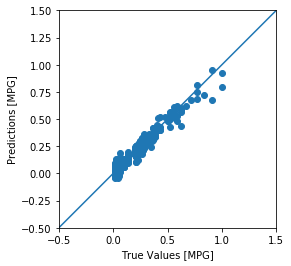

In [70]:
import matplotlib.pyplot as plt
a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values [MPG]')
plt.ylabel('Predictions [MPG]')
lims = [-0.5, 1.5]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)
